In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
import warnings

#from mlxtend.frequent_patterns import apriori
#from mlxtend.frequent_patterns import association_rules

In [181]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

## Dataset

In [182]:
data_df = pd.read_csv('../datasets/market_basket/market_basket.csv', header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [184]:
data_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [185]:
class MostPopularItemsPlot:
    
    def __init__(self, item_count):
        
        self.item_count = item_count
        self.bins = np.linspace(0, 1, item_count)
        self.colors = plt.cm.rainbow(self.bins)
    
    def draw(self, data):
        frequencies = data.value_counts().head(self.item_count)
        frequencies.plot.bar(color=self.colors, figsize=(13, 5))

        plt.title('Frequency of the most popular items', fontsize=20)
        plt.xticks(rotation = 90)
        plt.grid()
        plt.show()
        
class TopChoicesPlot:
    
    def __init__(self, item_count, source_label):
        
        self.item_count = item_count
        self.source_label = source_label
        self.bins = np.linspace(0, item_count, 1)
        self.colors = plt.cm.Set1(self.bins)

        warnings.filterwarnings('ignore')
        
    def draw(self, df, target):
        
        df[self.source_label] = self.source_label
        df_truncated = data_df.truncate(before = -1, after = self.item_count)
        
        graph = nx.from_pandas_edgelist(df_truncated, source = self.source_label, target=target, edge_attr = True)
        
        plt.rcParams['figure.figsize'] = (13, 13)
        pos = nx.spring_layout(graph)

        nx.draw_networkx_nodes(graph, pos, node_size=12000, node_color = self.colors)
        nx.draw_networkx_edges(graph, pos, width = 3, alpha = 0.6, edge_color='black')
        nx.draw_networkx_labels(graph, pos, font_size=15, font_family='sans-serif')

        plt.axis('off')
        plt.grid()
        plt.title(f'Top {self.item_count} first choices', fontsize = 20)
        plt.show()

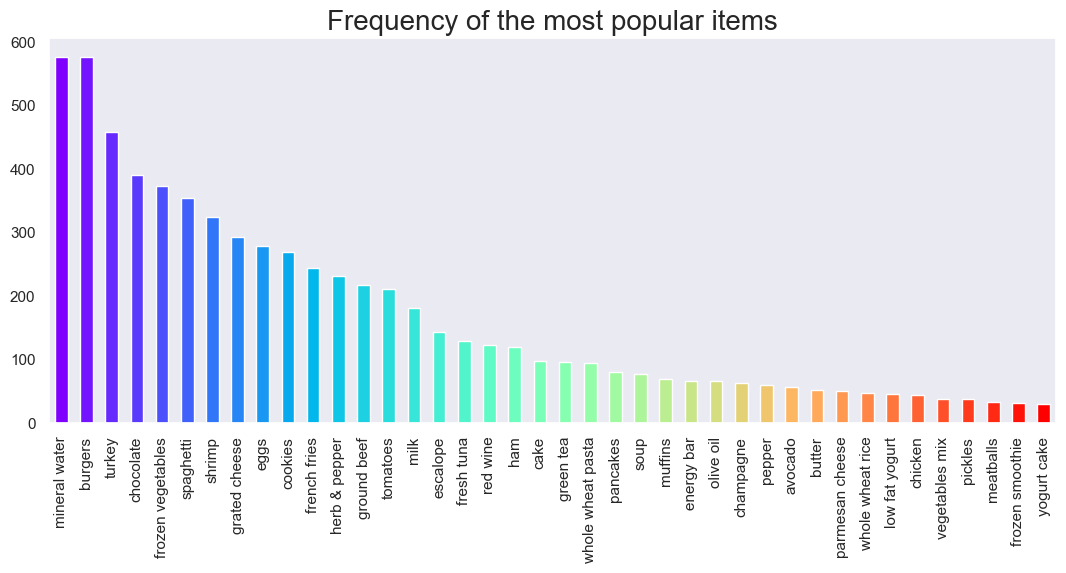

In [186]:
#Previewing most popular items frequencies for a specified column index
#Used for data analysis only. For example food items with bigger frequencies 
#should be correlated with more other items
preview_col = 0

mpi_plot = MostPopularItemsPlot(40)
mpi_plot.draw(data_df[preview_col])

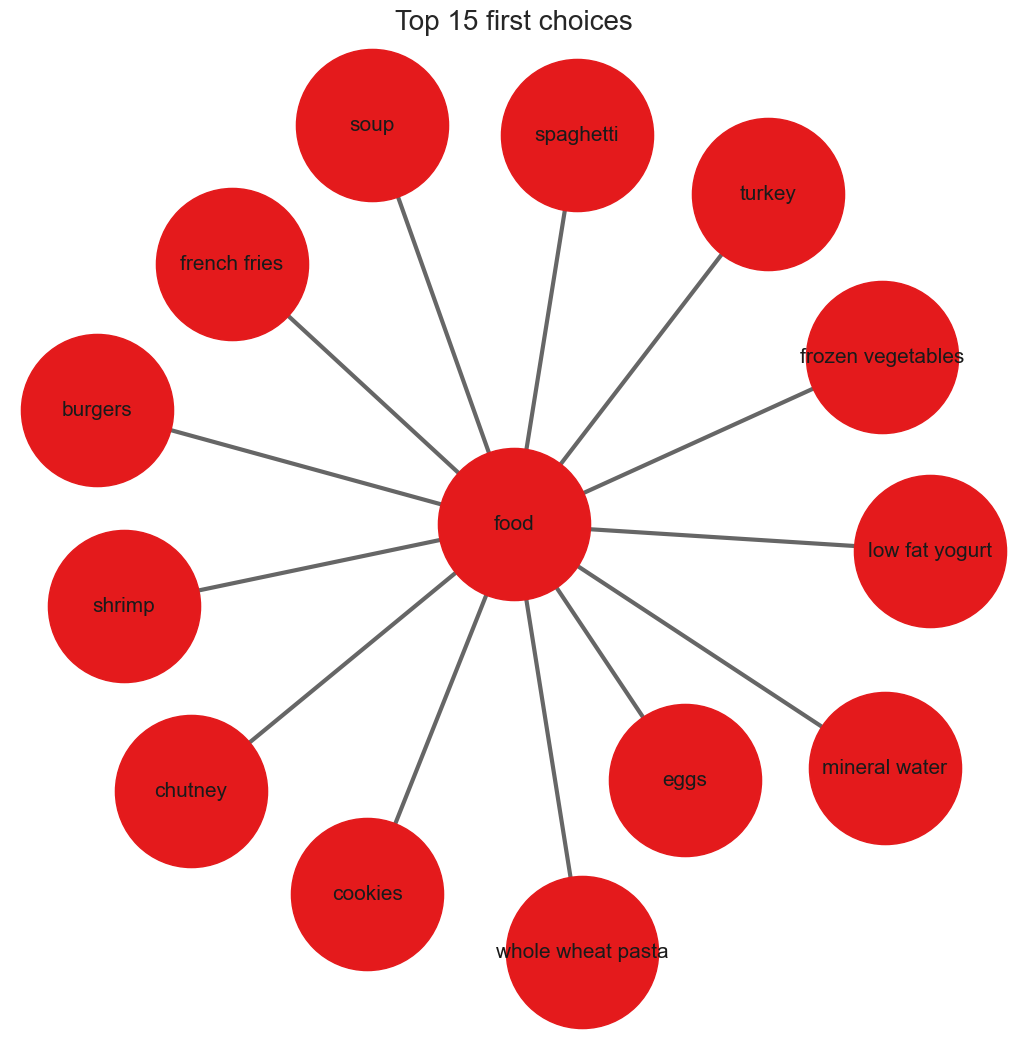

In [187]:
#Previewing top 15 choices for a specified column index
#Used for data analysis only. For example we can see how the number
#of food items descreses for the columns at a right table side
preview_col = 0

tc_plot = TopChoicesPlot(15, 'food')
tc_plot.draw(data_df, preview_col)